Feature 0 score: 3.755455
Feature 1 score: 6.320552
Feature 2 score: 6.778891
Feature 3 score: 129.589241
Feature 4 score: 27.152184
Feature 5 score: 54.268464
Accuracy = 0.691715
Accuracy = 0.691715


C:\Users\Mohua\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Mohua\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


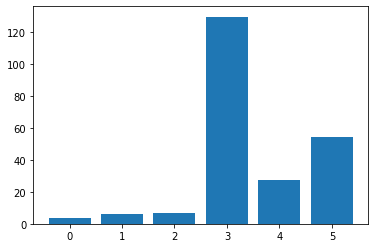

In [123]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
def read_data(filepath):
    data=pd.read_csv(filepath,header=None)
    dataValues=data.values
    # Separate into input and output variables
    X=dataValues[:,:-1]
    y=dataValues[:,-1]
    X=X.astype(str)
    return X, y


# Encode the inputs
def encode_features(X_train, X_test):
    oe=OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc=oe.transform(X_train)
    X_test_enc=oe.transform(X_test)
    return X_train_enc, X_test_enc

# Encode the outputs
def encode_targets(y_train,y_test):
    le=LabelEncoder()
    le.fit(y_train)
    y_train_enc=le.transform(y_train)
    y_test_enc=le.transform(y_test)
    return y_train_enc,y_test_enc

# Feature selection using chi-square
def select_features(func,X_train,y_train,X_test):
    fea_sel=SelectKBest(score_func=func, k=6)
    fea_sel.fit(X_train,y_train)
    X_train_fs=fea_sel.transform(X_train)
    X_test_fs=fea_sel.transform(X_test)
    return X_train_fs,X_test_fs, fea_sel

# Load the dataset
data=read_data('Datasets\Classification\car.data')

# split the data into training and test sets
X_train, X_test, y_train,y_test=train_test_split(X,y, test_size=.3, random_state=1)
X_train_enc, X_test_enc=encode_features(X_train, X_test)
y_train_enc,y_test_enc=encode_targets(y_train,y_test)


X_train_fs,X_test_fs,fea_sel=select_features(chi2,X_train_enc,y_train_enc,X_test_enc)

#print the scores for each feature
for i in range(len(fea_sel.scores_)):
    print('Feature %s score: %f' %(i, fea_sel.scores_[i]))
plt.bar([i for i in range(len(fea_sel.scores_))],fea_sel.scores_ )

# Run Logistic Regression model on all features
model=LogisticRegression(solver='liblinear')
model.fit(X_train_enc,y_train_enc)
y_pred=model.predict(X_test_enc)
accuracy_all=accuracy_score(y_test_enc,y_pred)
print('Accuracy = %f' %(accuracy_all))

# Run Logistic Regression model on selected features
model=LogisticRegression(solver='liblinear')
model.fit(X_train_fs,y_train_enc)
y_pred=model.predict(X_test_fs)
accuracy_all=accuracy_score(y_test_enc,y_pred)
print('Accuracy = %f' %(accuracy_all))

In [122]:

names=['buying','maint','doors','persons','lug_boot','safety','class']


In [89]:
# Separate into input and output variables
X=dataValues[:,:-1]
y=dataValues[:,-1]

In [90]:
data.groupby('class').size()

class
acc       384
good       69
unacc    1210
vgood      65
dtype: int64

In [91]:
X=X.astype(str)

Feature 0 score:3.7554549202979874
Feature 1 score:6.32055225985126
Feature 2 score:6.7788914094258
Feature 3 score:129.5892406866818
Feature 4 score:27.15218374065215
Feature 5 score:54.26846400467999


<BarContainer object of 6 artists>

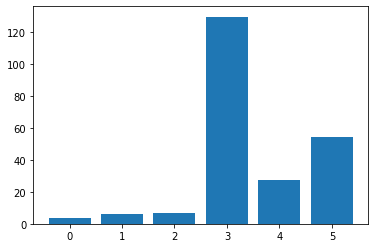

Accuracy: 0.678227


C:\Users\Mohua\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
